# Simple Plotting

With Jupyter notebooks, it becomes very easy to plot charts and graphs in various styles, in just a couple of line of code. To make things work, we invoke a Jupyter magic command and import the required function

```
%matplotlib inline
from matplotlib.pyplot import plot
```

## Line Plots

Now, we're free to plot line graphs:

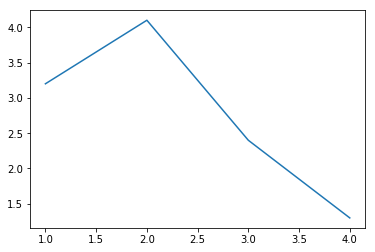

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4]
y_values = [3.2, 4.1, 2.4, 1.3]
plt.plot(x_values, y_values)

We can plot multiple series of data, and attach a name to each, with a legend.

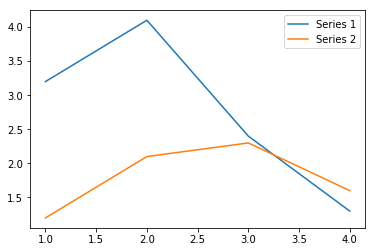

In [2]:
series1_x_values = [1, 2, 3, 4]
series1_y_values = [3.2, 4.1, 2.4, 1.3]

series2_x_values = [1, 2, 3, 4]
series2_y_values = [1.2, 2.1, 2.3, 1.6]

plt.plot(series1_x_values, series1_y_values, label='Series 1')
plt.plot(series2_x_values, series2_y_values, label='Series 2')
plt.legend()

## Scatter plots

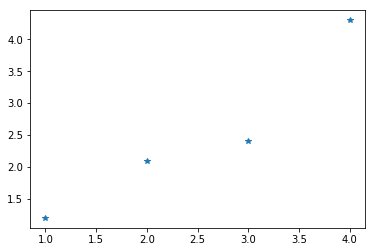

In [3]:
x_values = [1, 2, 3, 4]
y_values = [1.2, 2.1, 2.4, 4.3]
plt.plot(x_values, y_values, '*')

We can specify the range of the axes with `plt.xlim` and `plt.ylim`:

(0, 20)

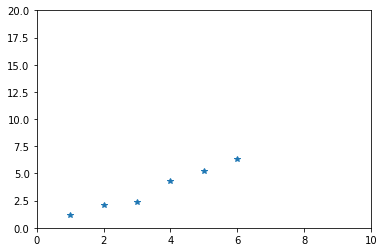

In [4]:
x_values = [1, 2, 3, 4, 5, 6]
y_values = [1.2, 2.1, 2.4, 4.3, 5.2, 6.3]
plt.plot(x_values, y_values, '*')
plt.xlim(0, 10)
plt.ylim(0, 20)

This is enough to get us started and visually explore some data from the other exercises!

## 3D Plots

The following code reads data from the csv file [datasets/CaliforniaHousing/cal_housing.data](datasets/CaliforniaHousing/cal_housing.data) as a Numpy ndarray. The data represents Housing Price data in California against a number of features like the No. of Rooms/Median Income etc.

The code  plots the Median House Value vs. the Total No. of Rooms and the Median Housing Age, as a 3D ScatterPlot in Matplotlib. We consider only the first 300 rows of data here to avoid performance issues with rendering.

(20640, 9)


<IPython.core.display.Javascript object>


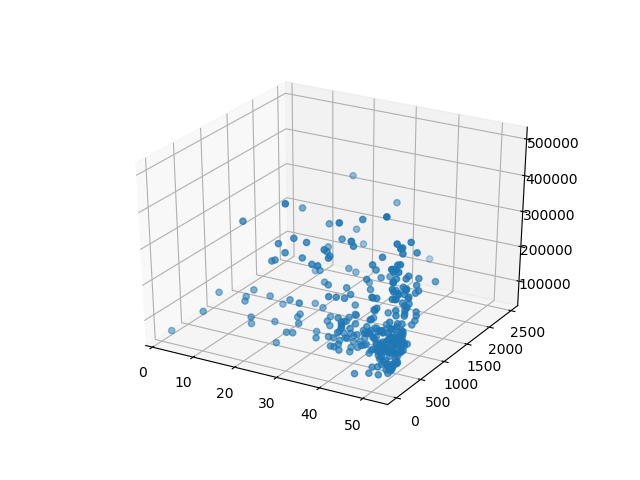

In [24]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

data = []
f = open('datasets/CaliforniaHousing/cal_housing.data')
for line in f.readlines():
    values = map(float, line.split(','))
    data.extend(values)
f.close()
data = np.array(data).reshape((-1, 9))
print(data.shape)

x = data[:300, 2]  # totalRooms
y = data[:300, 4]  # totalBedrooms
z = data[:300, 8]  # medianHouseValue

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)